# Data Visualization in Python
For this workshop we are going to be exploring the basics of seaborn, a statistical graphing library for Python. Seaborn is built on top of matplotlib, but provides a high level API and aesthetically pleasing graphs.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IPython features "magic functions", which all begin with a percent symbol. `%matplotlib inline` tells IPython to display plots in the notebook 

# Comparing matplotlib and seaborn
## With matplotlib

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

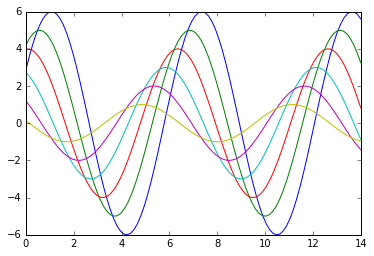

In [3]:
sinplot()

## With seaborn

In [4]:
import seaborn as sns

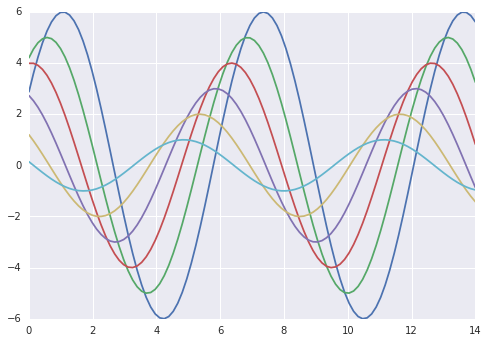

In [5]:
sinplot()

# Basic Plotting
These are just some basic plots with random data. Seaborn makes it easy to quickly plot data.

In [6]:
x = np.random.normal(size=100)

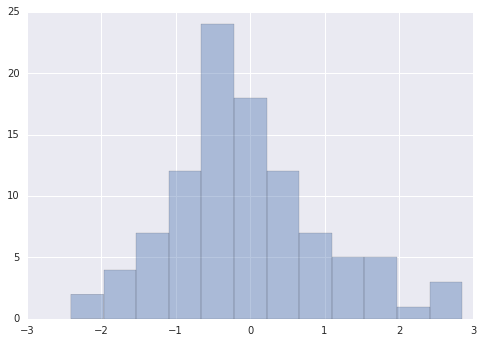

In [7]:
sns.distplot(x, kde=False)

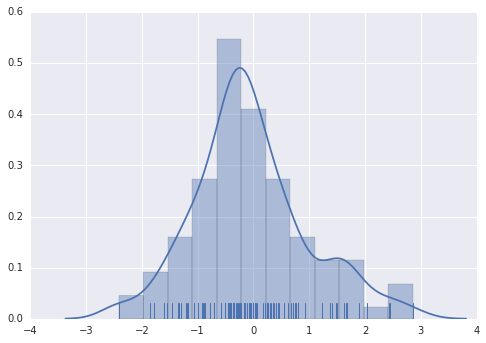

In [8]:
sns.distplot(x, rug=True)

# Linear Regression

In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


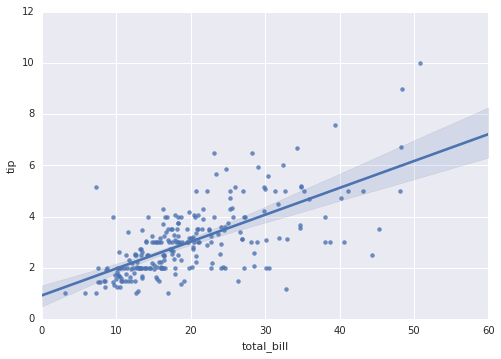

In [11]:
sns.regplot(x="total_bill", y="tip", data=tips)

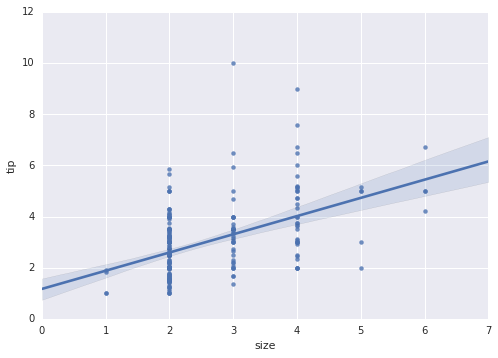

In [12]:
sns.regplot(x="size", y="tip", data=tips)

# Heatmaps

In [13]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

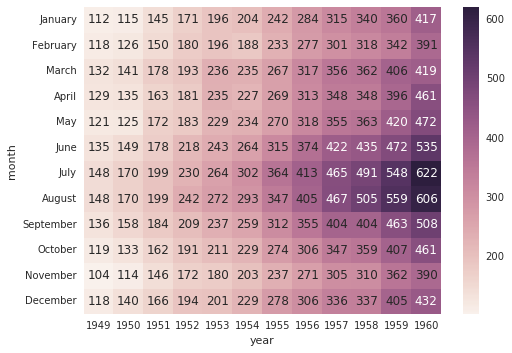

In [14]:
sns.heatmap(flights, annot=True, fmt="d")

# Titanic Dataset

Contains almost 900 rows of passengers from the Titanic. Contains the following features:
- survived - 1 = Survived, 0 = Died
- pclass - First class (1), Second class (2), or Third class (3).
- sex - The gender of the passenger
- age - The age of the passenger
- sibsp - Number of siblings and spouses the passenger had on board.
- parch - Number of parents and children the passenger had on board.
- fare - How much the passenger paid for the ticker.
- embarked - First letter of the city where the passenger boarded the Titanic
- who - Contains either man, woman, or child
- adult_male - Boolean value for whether or not the passenger is an adult male
- embark_town - Entire name of the city where the passenger boarded the Titanic
- alive - Same as survived, but with a yes or no rather than 0 or 1
- alone - Boolean value if the passenger was alone on the Titanic

In [15]:
titanic = sns.load_dataset("titanic")

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


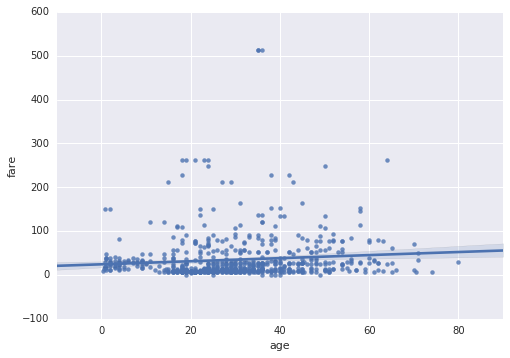

In [17]:
sns.regplot(x="age", y="fare", data=titanic)

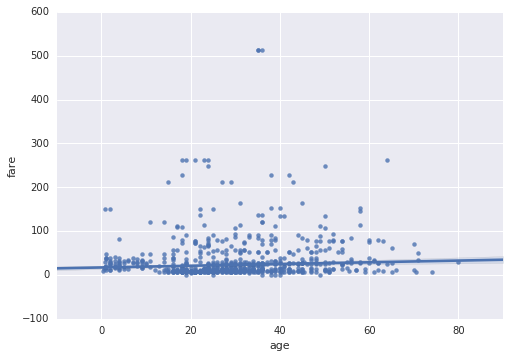

In [18]:
sns.regplot(x="age", y="fare", data=titanic, robust=True)

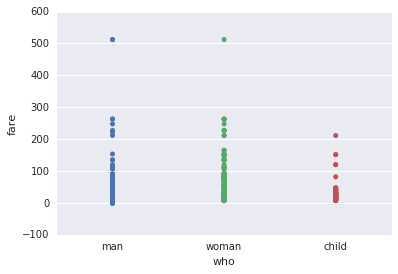

In [27]:
sns.stripplot(x="who", y="fare", data=titanic)

Check out the dataset on [Kaggle](https://www.kaggle.com/c/titanic) for a machine learning tutorial with it.

# Examples of Visualizations

[Craigslist Missed Connections](http://www.vox.com/a/craigslist-missed-connections/i-analyzed-10-000-craigslist-missed-connections-here-s-what-i-learned)

[18th and 19th Century Ship Logs](https://i.imgur.com/dmaEsgO.png)